In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [21]:


#Generate a synthetic dataset with clear deviations

np.random.seed(42)  # For reproducibility

# Let's assume that the target variable (droop_deviation) is influenced by 2 features:
# "converter_rating" (in MW) and "loading_value" (as percentage of rating)
converter_rating = np.random.uniform(600, 1000, 100)
loading_value = np.random.uniform(0, 1, 100)

#formula
droop_deviation = 0.5 * converter_rating + 0.2 * loading_value * converter_rating + np.random.normal(0, 100, 100)
data = pd.DataFrame({'converter_rating': converter_rating, 'loading_value': loading_value, 'droop_deviation': droop_deviation})



In [ ]:
#Sample Dataset (5 Converter System)
# data = pd.DataFrame({
#     'converter_rating': [900, 800, 1000, 750, 640],  # Converter ratings in MW
#     'loading_value': [675, 600, 750, 562.5, 480],    # Loading values at 75%
#     'remaining_capacity': [225, 200, 250, 187.5, 160],  # Remaining capacity after loading
#     'droop_constant': [0.04, 0.04, 0.04, 0.04, 0.04],  # Droop constant for each converter
#     'time_constant': [0.05, 0.05, 0.05, 0.05, 0.05],   # Time constant for each converter
#     'capacitor_value': [113, 100, 125, 94, 80],  # Capacitor values for each converter
#     'line_capacitance': [405, 240, 520, 405, 120],  # Line capacitance values
#     'voltage_deviation': [0.02, 0.03, 0.015, 0.025, 0.018],  # Voltage deviation values
#     'droop_deviation': [0.005, 0.007, 0.006, 0.004, 0.003]   # Target variable: Droop deviation
# })

In [23]:
#Preparing the data for Linear Regression

# Features (independent variables)
# X = data[['converter_rating', 'loading_value', 'remaining_capacity', 'droop_constant', 
#           'time_constant', 'capacitor_value', 'line_capacitance', 'voltage_deviation']]

# # Target variable (dependent variable)
# y = data['droop_deviation']

X = data[['converter_rating', 'loading_value']]
y = data['droop_deviation']




In [24]:
# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
#Standardize the Data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#Initialize and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
#Make Predictions
y_pred = model.predict(X_test)

In [28]:
#Evaluate the Model with MSE (Mean Squared Error) or MAE (Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))  # Calculate Mean Absolute Error (MAE)


In [29]:
print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


Evaluation Metrics:
Mean Squared Error (MSE): 6636.298622294725
Mean Absolute Error (MAE): 72.99019976307365


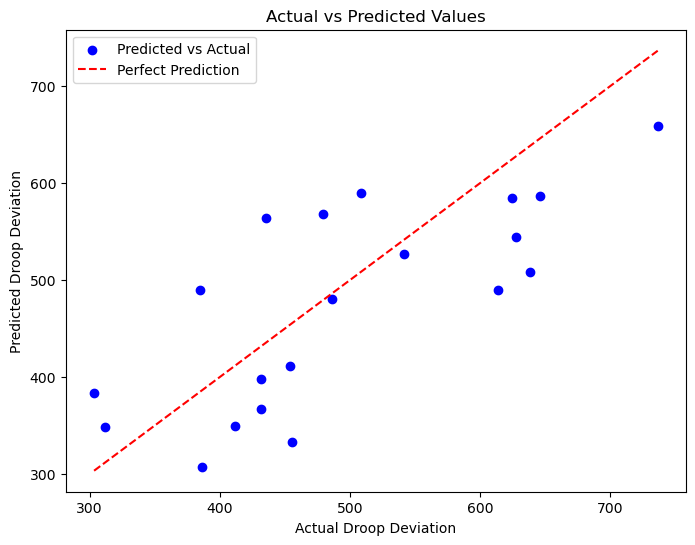

In [30]:
#Visualize the Results: Plot actual vs predicted values





predictions = model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, color='blue', label='Predicted vs Actual')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Droop Deviation')
plt.ylabel('Predicted Droop Deviation')


plt.legend()


plt.show()
